In [1]:
import sys
import os
import requests
import pandas as pd
from datetime import datetime, timedelta
from pathlib import Path
import mplfinance as mpf
import matplotlib.pyplot as plt
import numpy as np 

notebook_dir = os.path.dirname(os.path.abspath('test.ipynb'))

backtest_dir = os.path.join(notebook_dir, '..', 'backtest')
sys.path.append(backtest_dir)

utils_dir = os.path.join(notebook_dir, '..', 'utils')
sys.path.append(utils_dir)

from calculate_performance import Performance
from calculate_performance import Performance_hedged
from path_helper import *

In [2]:
symbol_pool = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'BCCUSDT', 'NEOUSDT', 'LTCUSDT', 'QTUMUSDT', 'ADAUSDT', 'XRPUSDT', 'EOSUSDT', 'TUSDUSDT', 'IOTAUSDT', 'XLMUSDT', 'ONTUSDT', 'TRXUSDT', 'ETCUSDT', 'ICXUSDT', 'VENUSDT', 'NULSUSDT', 'VETUSDT', 'PAXUSDT', 'BCHABCUSDT', 'BCHSVUSDT', 'USDCUSDT', 'LINKUSDT', 'WAVESUSDT', 'BTTUSDT', 'USDSUSDT', 'ONGUSDT', 'HOTUSDT', 'ZILUSDT', 'ZRXUSDT', 'FETUSDT', 'BATUSDT', 'XMRUSDT', 'ZECUSDT', 'IOSTUSDT', 'CELRUSDT', 'DASHUSDT', 'NANOUSDT', 'OMGUSDT', 'THETAUSDT', 'ENJUSDT', 'MITHUSDT', 'MATICUSDT', 'ATOMUSDT', 'TFUELUSDT', 'ONEUSDT', 'FTMUSDT', 'ALGOUSDT', 'USDSBUSDT', 'GTOUSDT', 'ERDUSDT', 'DOGEUSDT', 'DUSKUSDT', 'ANKRUSDT', 'WINUSDT', 'COSUSDT', 'NPXSUSDT', 'COCOSUSDT', 'MTLUSDT', 'TOMOUSDT', 'PERLUSDT', 'DENTUSDT', 'MFTUSDT', 'KEYUSDT', 'STORMUSDT', 'DOCKUSDT', 'WANUSDT', 'FUNUSDT', 'CVCUSDT', 'CHZUSDT', 'BANDUSDT', 'BUSDUSDT', 'BEAMUSDT', 'XTZUSDT', 'RENUSDT', 'RVNUSDT', 'HCUSDT', 'HBARUSDT', 'NKNUSDT', 'STXUSDT', 'KAVAUSDT', 'ARPAUSDT', 'IOTXUSDT', 'RLCUSDT', 'MCOUSDT', 'CTXCUSDT', 'BCHUSDT', 'TROYUSDT', 'VITEUSDT', 'FTTUSDT', 'EURUSDT', 'OGNUSDT', 'DREPUSDT', 'BULLUSDT', 'BEARUSDT', 'ETHBULLUSDT', 'ETHBEARUSDT', 'TCTUSDT', 'WRXUSDT', 'BTSUSDT', 'LSKUSDT', 'BNTUSDT', 'LTOUSDT', 'EOSBULLUSDT', 'EOSBEARUSDT', 'XRPBULLUSDT', 'XRPBEARUSDT', 'STRATUSDT', 'AIONUSDT', 'MBLUSDT', 'COTIUSDT', 'BNBBULLUSDT', 'BNBBEARUSDT', 'STPTUSDT', 'WTCUSDT', 'DATAUSDT', 'XZCUSDT', 'SOLUSDT', 'CTSIUSDT', 'HIVEUSDT', 'CHRUSDT', 'BTCUPUSDT', 'BTCDOWNUSDT', 'GXSUSDT', 'ARDRUSDT', 'LENDUSDT', 'MDTUSDT', 'STMXUSDT', 'KNCUSDT', 'REPUSDT', 'LRCUSDT', 'PNTUSDT', 'COMPUSDT', 'BKRWUSDT', 'SCUSDT', 'ZENUSDT', 'SNXUSDT', 'ETHUPUSDT', 'ETHDOWNUSDT', 'ADAUPUSDT', 'ADADOWNUSDT', 'LINKUPUSDT', 'LINKDOWNUSDT', 'VTHOUSDT', 'DGBUSDT', 'GBPUSDT', 'SXPUSDT', 'MKRUSDT', 'DAIUSDT', 'DCRUSDT', 'STORJUSDT', 'BNBUPUSDT', 'BNBDOWNUSDT', 'XTZUPUSDT', 'XTZDOWNUSDT', 'MANAUSDT', 'AUDUSDT', 'YFIUSDT', 'BALUSDT', 'BLZUSDT', 'IRISUSDT', 'KMDUSDT', 'JSTUSDT', 'SRMUSDT', 'ANTUSDT', 'CRVUSDT', 'SANDUSDT', 'OCEANUSDT', 'NMRUSDT', 'DOTUSDT', 'LUNAUSDT', 'RSRUSDT', 'PAXGUSDT', 'WNXMUSDT', 'TRBUSDT', 'BZRXUSDT', 'SUSHIUSDT', 'YFIIUSDT', 'KSMUSDT', 'EGLDUSDT', 'DIAUSDT', 'RUNEUSDT', 'FIOUSDT', 'UMAUSDT', 'EOSUPUSDT', 'EOSDOWNUSDT', 'TRXUPUSDT', 'TRXDOWNUSDT', 'XRPUPUSDT', 'XRPDOWNUSDT', 'DOTUPUSDT', 'DOTDOWNUSDT', 'BELUSDT', 'WINGUSDT', 'LTCUPUSDT', 'LTCDOWNUSDT', 'UNIUSDT', 'NBSUSDT', 'OXTUSDT', 'SUNUSDT', 'AVAXUSDT', 'HNTUSDT', 'FLMUSDT', 'UNIUPUSDT', 'UNIDOWNUSDT', 'ORNUSDT', 'UTKUSDT', 'XVSUSDT', 'ALPHAUSDT', 'AAVEUSDT', 'NEARUSDT', 'SXPUPUSDT', 'SXPDOWNUSDT', 'FILUSDT', 'FILUPUSDT', 'FILDOWNUSDT', 'YFIUPUSDT', 'YFIDOWNUSDT', 'INJUSDT', 'AUDIOUSDT', 'CTKUSDT', 'BCHUPUSDT', 'BCHDOWNUSDT', 'AKROUSDT', 'AXSUSDT', 'HARDUSDT', 'DNTUSDT', 'STRAXUSDT', 'UNFIUSDT', 'ROSEUSDT', 'AVAUSDT', 'XEMUSDT', 'AAVEUPUSDT', 'AAVEDOWNUSDT', 'SKLUSDT', 'SUSDUSDT', 'SUSHIUPUSDT', 'SUSHIDOWNUSDT', 'XLMUPUSDT', 'XLMDOWNUSDT', 'GRTUSDT', 'JUVUSDT', 'PSGUSDT', '1INCHUSDT', 'REEFUSDT', 'OGUSDT', 'ATMUSDT', 'ASRUSDT', 'CELOUSDT', 'RIFUSDT', 'BTCSTUSDT', 'TRUUSDT', 'CKBUSDT', 'TWTUSDT', 'FIROUSDT', 'LITUSDT', 'SFPUSDT', 'DODOUSDT', 'CAKEUSDT', 'ACMUSDT', 'BADGERUSDT', 'FISUSDT', 'OMUSDT', 'PONDUSDT', 'DEGOUSDT', 'ALICEUSDT', 'LINAUSDT', 'PERPUSDT', 'RAMPUSDT', 'SUPERUSDT', 'CFXUSDT', 'EPSUSDT', 'AUTOUSDT', 'TKOUSDT', 'PUNDIXUSDT', 'TLMUSDT', '1INCHUPUSDT', '1INCHDOWNUSDT', 'BTGUSDT', 'MIRUSDT', 'BARUSDT', 'FORTHUSDT', 'BAKEUSDT', 'BURGERUSDT', 'SLPUSDT', 'SHIBUSDT', 'ICPUSDT', 'ARUSDT', 'POLSUSDT', 'MDXUSDT', 'MASKUSDT', 'LPTUSDT', 'NUUSDT', 'XVGUSDT', 'ATAUSDT', 'GTCUSDT', 'TORNUSDT', 'KEEPUSDT', 'ERNUSDT', 'KLAYUSDT', 'PHAUSDT', 'BONDUSDT', 'MLNUSDT', 'DEXEUSDT', 'C98USDT', 'CLVUSDT', 'QNTUSDT', 'FLOWUSDT', 'TVKUSDT', 'MINAUSDT', 'RAYUSDT', 'FARMUSDT', 'ALPACAUSDT', 'QUICKUSDT', 'MBOXUSDT', 'FORUSDT', 'REQUSDT', 'GHSTUSDT', 'WAXPUSDT', 'TRIBEUSDT', 'GNOUSDT', 'XECUSDT', 'ELFUSDT', 'DYDXUSDT', 'POLYUSDT', 'IDEXUSDT', 'VIDTUSDT', 'USDPUSDT', 'GALAUSDT', 'ILVUSDT', 'YGGUSDT', 'SYSUSDT', 'DFUSDT', 'FIDAUSDT', 'FRONTUSDT', 'CVPUSDT', 'AGLDUSDT', 'RADUSDT', 'BETAUSDT', 'RAREUSDT', 'LAZIOUSDT', 'CHESSUSDT', 'ADXUSDT', 'AUCTIONUSDT', 'DARUSDT', 'BNXUSDT', 'RGTUSDT', 'MOVRUSDT', 'CITYUSDT', 'ENSUSDT', 'KP3RUSDT', 'QIUSDT', 'PORTOUSDT', 'POWRUSDT', 'VGXUSDT', 'JASMYUSDT', 'AMPUSDT', 'PLAUSDT', 'PYRUSDT', 'RNDRUSDT', 'ALCXUSDT', 'SANTOSUSDT', 'MCUSDT', 'ANYUSDT', 'BICOUSDT', 'FLUXUSDT', 'FXSUSDT', 'VOXELUSDT', 'HIGHUSDT', 'CVXUSDT', 'PEOPLEUSDT', 'OOKIUSDT', 'SPELLUSDT', 'USTUSDT', 'JOEUSDT', 'ACHUSDT', 'IMXUSDT', 'GLMRUSDT', 'LOKAUSDT', 'SCRTUSDT', 'API3USDT', 'BTTCUSDT', 'ACAUSDT', 'ANCUSDT', 'XNOUSDT', 'WOOUSDT', 'ALPINEUSDT', 'TUSDT', 'ASTRUSDT', 'GMTUSDT', 'KDAUSDT', 'APEUSDT', 'BSWUSDT', 'BIFIUSDT', 'MULTIUSDT', 'STEEMUSDT', 'MOBUSDT', 'NEXOUSDT', 'REIUSDT', 'GALUSDT', 'LDOUSDT', 'EPXUSDT', 'OPUSDT', 'LEVERUSDT', 'STGUSDT', 'LUNCUSDT', 'GMXUSDT', 'NEBLUSDT', 'POLYXUSDT', 'APTUSDT', 'OSMOUSDT', 'HFTUSDT', 'PHBUSDT', 'HOOKUSDT', 'MAGICUSDT', 'HIFIUSDT', 'RPLUSDT', 'PROSUSDT', 'AGIXUSDT', 'GNSUSDT', 'SYNUSDT', 'VIBUSDT', 'SSVUSDT', 'LQTYUSDT', 'AMBUSDT', 'BETHUSDT', 'USTCUSDT', 'GASUSDT', 'GLMUSDT', 'PROMUSDT', 'QKCUSDT', 'UFTUSDT', 'IDUSDT', 'ARBUSDT', 'LOOMUSDT', 'OAXUSDT', 'RDNTUSDT', 'WBTCUSDT', 'EDUUSDT', 'SUIUSDT', 'AERGOUSDT', 'PEPEUSDT', 'FLOKIUSDT', 'ASTUSDT', 'SNTUSDT', 'COMBOUSDT', 'MAVUSDT', 'PENDLEUSDT', 'ARKMUSDT', 'WBETHUSDT', 'WLDUSDT', 'FDUSDUSDT', 'SEIUSDT', 'CYBERUSDT', 'ARKUSDT', 'CREAMUSDT', 'GFTUSDT', 'IQUSDT', 'NTRNUSDT', 'TIAUSDT', 'MEMEUSDT', 'ORDIUSDT', 'BEAMXUSDT', 'PIVXUSDT', 'VICUSDT', 'BLURUSDT', 'VANRYUSDT', 'AEURUSDT', 'JTOUSDT', '1000SATSUSDT', 'BONKUSDT', 'ACEUSDT', 'NFPUSDT', 'AIUSDT', 'XAIUSDT', 'MANTAUSDT', 'ALTUSDT', 'JUPUSDT', 'PYTHUSDT', 'RONINUSDT', 'DYMUSDT', 'PIXELUSDT', 'STRKUSDT', 'PORTALUSDT', 'PDAUSDT', 'AXLUSDT', 'WIFUSDT', 'METISUSDT', 'AEVOUSDT', 'BOMEUSDT', 'ETHFIUSDT', 'ENAUSDT', 'WUSDT', 'TNSRUSDT', 'SAGAUSDT', 'TAOUSDT', 'OMNIUSDT', 'REZUSDT', 'BBUSDT', 'NOTUSDT', 'IOUSDT', 'ZKUSDT', 'LISTAUSDT', 'ZROUSDT', 'GUSDT', 'BANANAUSDT', 'RENDERUSDT']

In [79]:
import pandas as pd
import numpy as np

def generate_signals(df):
    k = 12
    p = 12
    price = 0
    flag = 0
    for i in range(8, len(df)):
        if df['price_pct_change'].iloc[i] > 0 and df['price_pct_change'].iloc[i-k:i].mean() > 0 and df['price_pct_change'].iloc[i-k:i].std() > 0 and flag == 0:
            if df['price_pct_change'].iloc[i] > df['price_pct_change'].iloc[i-k:i].mean() + 1 * df['price_pct_change'].iloc[i-k:i].std() and df['long_OI_pct_change'].iloc[i] > df['long_OI_pct_change'].iloc[i-k:i].mean() + 1*df['long_OI_pct_change'].iloc[i-k:i].std():
                df.loc[df.index[i], 'signal'] = -1
                #price = df['close'].iloc[i]
                #print('開倉價格',price)
                flag = 1
        elif flag == 1:
            #止盈條件
            if df['open'].iloc[i] < df['KC_mid'].iloc[i] or df['close'].iloc[i] < df['KC_mid'].iloc[i]:
                #print('平倉價格',df['KC_mid'].iloc[i])
                df.loc[df.index[i], 'signal'] = 0
                flag = 0
            #止損條件
            else if 
            
            '''
            if df['price_pct_change'].iloc[i] < df['price_pct_change'].iloc[i-p:i].mean() - df['price_pct_change'].iloc[i-p:i].std()  or  df['long_OI_pct_change'].iloc[i] < df['long_OI_pct_change'].iloc[i-p:i].mean() - df['long_OI_pct_change'].iloc[i-p:i].std():
                if flag == 1:
                    print('平倉價格',df['close'].iloc[i])
                    df.loc[df.index[i], 'signal'] = 0
                    flag = 0
            '''
        else:
            df.loc[df.index[i], 'signal'] = np.nan
    
    #計算signal為-1的次數
    signal_count = df['signal'].value_counts()
    print(signal_count)
    return df

### Test specific currency

signal
-1.0    34
 0.0    33
Name: count, dtype: int64
0.45438125
0.45915625
0.47930625
0.47195
0.49455625000000003
0.51524375
0.5579500000000001
0.54660625
0.55249375
0.5709
0.58111875
0.5530937499999999
0.5547625
0.5493812499999999
0.5654125
0.5559000000000001
0.55658125
0.5406187499999999
0.5407062499999999
0.5934
0.59251875
0.48096875
0.52748125
0.5266124999999999
0.5020125
0.4618625
0.45122500000000004
0.40294375
0.37673125
0.33857499999999996
0.35060625
總績效 -0.0887 
交易次數 31 
平均績效 -0.0029 
年化報酬率 -0.6484 
勝率 0.06 
平均獲利 0.0001 
平均虧損 -0.0031 
賺賠比 0.0354 
期望值 -0.9332 
最大連續虧損 -0.0081
最大資金回落 0.0851
夏普比率 -16.042


C:\Users\User\AppData\Local\Temp\ipykernel_4224\1015570406.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trade = pd.concat([trade, new_trade], ignore_index=True)


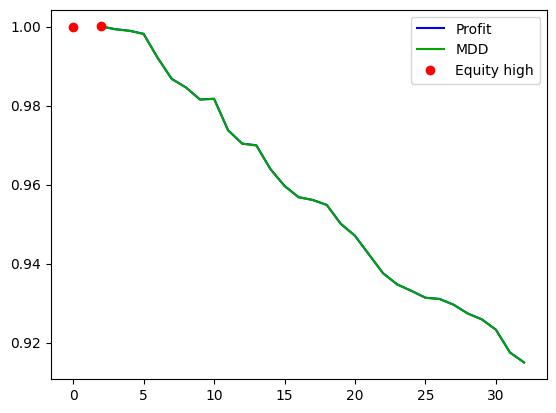

,product,bs,order_time,order_price,cover_time,cover_price,order_unit,ret,acc_ret,acc_max_cap,dd,new_high
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AEVOUSDT,-1,77,0.45485,88,0.454381,1,0.000031,1.000031,1.000031,1.0,1.000031
3,AEVOUSDT,-1,94,0.45930,96,0.459156,1,-0.000687,0.999344,1.000031,0.999313,NaN
4,AEVOUSDT,-1,115,0.47960,144,0.479306,1,-0.000388,0.998956,1.000031,0.998926,NaN
5,AEVOUSDT,-1,207,0.47205,211,0.471950,1,-0.000788,0.998169,1.000031,0.998138,NaN
6,AEVOUSDT,-1,301,0.49205,319,0.494556,1,-0.006093,0.992087,1.000031,0.992056,NaN
7,AEVOUSDT,-1,327,0.51300,341,0.515244,1,-0.005374,0.986755,1.000031,0.986725,NaN
8,AEVOUSDT,-1,355,0.55730,382,0.557950,1,-0.002166,0.984618,1.000031,0.984588,NaN
9,AEVOUSDT,-1,444,0.54545,450,0.546606,1,-0.00312,0.981546,1.000031,0.981516,NaN


In [80]:
#實行交易策略
#並且紀錄每一次交易的product, bs, order_time, order_price, cover_time, cover_price, order_unit
import pandas as pd
import numpy as np

product = 'AEVOUSDT'

# Load data
filepath = os.path.join(SIGNAL_PATH, f"{product}_signal.csv")
df = pd.read_csv(filepath)


#計算過去16根的KC上軌值在當前的值
df['KC_up'] = df['close'].rolling(window=16).mean() + 1 * df['close'].rolling(window=16).std()
#計算過去16根的KC下軌值在當前的值
df['KC_down'] = df['close'].rolling(window=16).mean() - 1 * df['close'].rolling(window=16).std()
df['KC_mid'] = df['close'].rolling(window=16).mean()

# Generate signals
signals = generate_signals(df)
signals.dropna(inplace=True)



# Initialize variables
trade = pd.DataFrame(columns=['product', 'bs', 'order_time', 'order_price', 'cover_time', 'cover_price', 'order_unit'])
order_unit = 1
order_price = 0
cover_price = 0
bs = 0

# Execute signals
for i in range(len(df)):
    if i == 0:
        continue
    if signals['signal'].iloc[i] == -1 and bs == 0 and i < len(df)-1:
        order_price = ((df['close']+df['open'])/2).iloc[i+1]
        order_time = signals.index[i]
        bs = -1
    elif signals['signal'].iloc[i] == 0 and bs == -1 and i < len(df)-2:
        cover_price = df['KC_mid'].iloc[i]
        print(cover_price)
        cover_time = signals.index[i]
        new_trade = pd.DataFrame([[product, bs, order_time, order_price, cover_time, cover_price, order_unit]],
                                 columns=['product', 'bs', 'order_time', 'order_price', 'cover_time', 'cover_price', 'order_unit'])
        trade = pd.concat([trade, new_trade], ignore_index=True)
        bs = 0
# Calculate performance
Performance(trade)

### Test all currency

In [ ]:
def generate_signals_all(df):
    k = 16
    p = 8
    price = 0
    flag = 0
    for i in range(16, len(df)):
        if df['price_pct_change'].iloc[i] > 0 and df['price_pct_change'].iloc[i-k:i].mean() > 0 and df['price_pct_change'].iloc[i-k:i].std() > 0 and flag == 0:
            if df['price_pct_change'].iloc[i] > df['price_pct_change'].iloc[i-k:i].mean() + 1 * df['price_pct_change'].iloc[i-k:i].std() and df['long_OI_pct_change'].iloc[i] > df['long_OI_pct_change'].iloc[i-k:i].mean() + 1* df['long_OI_pct_change'].iloc[i-k:i].std():
                df.loc[df.index[i], 'signal'] = -1
                #開倉價格
                price = df['close'].iloc[i]
                print('開倉價格',price)
                flag = 1
        elif df['close'].iloc[i] < price and flag == 1:
            if df['price_pct_change'].iloc[i] < df['price_pct_change'].iloc[i-p:i].mean() - df['price_pct_change'].iloc[i-p:i].std()  or  df['long_OI_pct_change'].iloc[i] < df['long_OI_pct_change'].iloc[i-p:i].mean() - df['long_OI_pct_change'].iloc[i-p:i].std():
                if flag == 1:
                    print('平倉價格',df['close'].iloc[i])
                    df.loc[df.index[i], 'signal'] = 0
                    flag = 0
        else:
            df.loc[df.index[i], 'signal'] = np.nan
    
    #計算signal為-1的次數
    signal_count = df['signal'].value_counts()
    print(signal_count)
    return df

In [10]:
df = pd.read_csv(r'D:\allen_trading_crypto\data\all_signal.csv')
df.set_index(['datetime','symbol'], inplace=True)
long_OI_pct_change = df['long_OI_pct_change'].unstack()
price_pct_change = df['price_pct_change'].unstack()
close = df['close'].unstack()
open = df['open'].unstack()

In [15]:
long_OI_pct_change_zscore = (long_OI_pct_change-long_OI_pct_change.rolling(window=16).mean())/long_OI_pct_change.rolling(window=16).std()
price_pct_change_zscore = (price_pct_change-price_pct_change.rolling(window=16).mean())/price_pct_change.rolling(window=16).std()
short_signal = (long_OI_pct_change_zscore > 1) & (price_pct_change_zscore > 1)

<Axes: xlabel='datetime'>

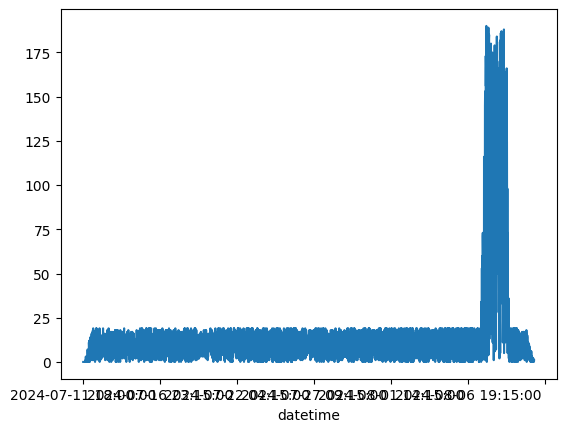

In [23]:
recover_signal.sum(axis=1).plot()

<Axes: xlabel='datetime'>

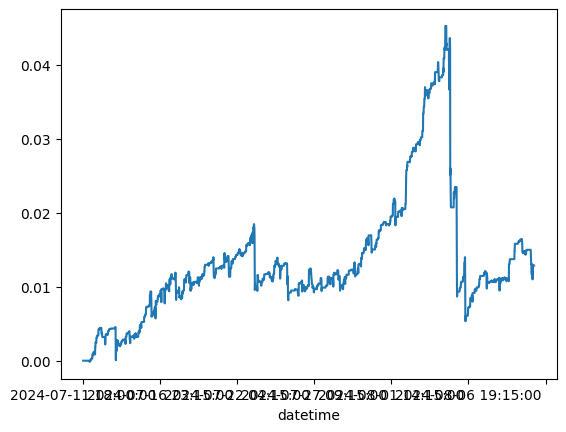

In [24]:
recover_signal = (price_pct_change_zscore <= 0)
position = short_signal.astype(int) * (-1)
position[~short_signal]=np.nan
position[recover_signal]=0
position = position.ffill().fillna(0)
exp_ret = (close/close.shift(1)-1).shift(-1)
(position*exp_ret).mean(axis=1).cumsum().plot()

總績效 0 
交易次數 50 
平均績效 nan 
年化報酬率 nan 
勝率 0.0 
平均獲利 nan 
平均虧損 nan 
賺賠比 nan 
期望值 nan 
最大連續虧損 1
最大資金回落 0.0
夏普比率 nan


C:\Users\User\AppData\Local\Temp\ipykernel_16188\1913000440.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  trade = pd.concat([trade, new_trade], ignore_index=True) #這一步是將新的交易紀錄加入到trade這個dataframe中


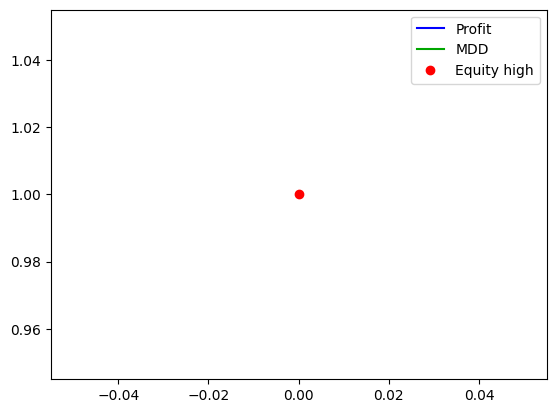

,product,bs,order_time,order_price,cover_time,cover_price,order_unit,hedge_product,hedge_bs,hedge_order_time,hedge_order_price,hedge_cover_time,hedge_cover_price,hedge_order_unit,ret,acc_ret,acc_max_cap,dd,new_high
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACEUSDT,-1,1723153500000,2.3356,1723179600000,2.3134,1,BTCUSDT,1,1723153500000,NaN,1723179600000,NaN,1,NaN,NaN,NaN,NaN,NaN
3,ACEUSDT,-1,1720792800000,2.7068,1720793700000,2.6973,1,BTCUSDT,1,1720792800000,NaN,1720793700000,NaN,1,NaN,NaN,NaN,NaN,NaN
4,ACEUSDT,-1,1720798200000,2.7577,1720800000000,2.7436,1,BTCUSDT,1,1720798200000,NaN,1720800000000,NaN,1,NaN,NaN,NaN,NaN,NaN
5,ACEUSDT,-1,1721014200000,2.9128,1721016900000,2.8879,1,BTCUSDT,1,1721014200000,NaN,1721016900000,NaN,1,NaN,NaN,NaN,NaN,NaN
6,ACEUSDT,-1,1721178900000,3.1750,1721181600000,3.1565,1,BTCUSDT,1,1721178900000,NaN,1721181600000,NaN,1,NaN,NaN,NaN,NaN,NaN
7,ACEUSDT,-1,1721191500000,3.1649,1721196000000,3.1608,1,BTCUSDT,1,1721191500000,NaN,1721196000000,NaN,1,NaN,NaN,NaN,NaN,NaN
8,ACEUSDT,-1,1721198700000,3.1909,1721201400000,3.1789,1,BTCUSDT,1,1721198700000,NaN,1721201400000,NaN,1,NaN,NaN,NaN,NaN,NaN
9,ACEUSDT,-1,1721264400000,3.2026,1721279700000,3.1920,1,BTCUSDT,1,1721264400000,NaN,1721279700000,NaN,1,NaN,NaN,NaN,NaN,NaN


In [30]:
'''
df2 = pd.read_csv('D:/allen_trading_crypto/data/Signal/BTCUSDT_UPERP_15m.csv')
#rename df2 columns
df2.rename(columns={'datetime':'datetime', 'open':'BTC_open', 'high':'BTC_high', 'low':'BTC_low', 'close':'BTC_close', 'volume':'BTC_volume'}, inplace=True)
df2.set_index('datetime', inplace=True)

# merge
df3 = pd.merge(df, df2, left_index=True, right_index=True, how='left')
# Initialize variables
trade = pd.DataFrame(columns=['product', 'bs', 'order_time', 'order_price', 'cover_time', 'cover_price', 'order_unit','hedge_product','hedge_bs','hedge_order_time','hedge_order_price','hedge_cover_time','hedge_cover_price','hedge_order_unit'])
order_unit = 1
order_price = 0
cover_price = 0
bs = 0

hedge_product = 'BTCUSDT'

# Execute signals
for i in range(len(df3)):
    if i == 0:
        continue
    if signals['signal'].iloc[i] == -1 and bs == 0:
        order_price = df3['close'].iloc[i]
        hedge_order_price = df3['BTC_close'].iloc[i]
        order_time = signals.index[i]
        bs = -1
    elif signals['signal'].iloc[i] == 0 and bs == -1:
        cover_price = df3['close'].iloc[i]
        hedge_cover_price = df3['BTC_close'].iloc[i]
        cover_time = signals.index[i]
        new_trade = pd.DataFrame([[product, bs, order_time, order_price, cover_time, cover_price, order_unit, hedge_product, 1, order_time, hedge_order_price, cover_time, hedge_cover_price, order_unit]],
                                 columns=['product', 'bs', 'order_time', 'order_price', 'cover_time', 'cover_price', 'order_unit','hedge_product','hedge_bs','hedge_order_time','hedge_order_price','hedge_cover_time','hedge_cover_price','hedge_order_unit'])
        trade = pd.concat([trade, new_trade], ignore_index=True) #這一步是將新的交易紀錄加入到trade這個dataframe中
        bs = 0
# Calculate performance
Performance_hedged(trade)
'''